# Rapport Laforge - Hassouna Clustering

### Imporation des librairies à éxécuter .. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [28]:
#  Paramètres à modifier facilement
dataset_name = 'smile3.arff'   # <-- change juste cette ligne quand tu veux un autre dataset

# --- Chargement du dataset ---
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    # On suppose que la dernière colonne est une étiquette non numérique
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

file_path = os.path.join('../dataset', 'artificial', dataset_name)
X = load_arff_data(file_path)
print("Shape du dataset :", X.shape)

# --- Standardisation des données (important pour K-Means) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape du dataset : (1000, 2)


##### importation d'une data set et affichage sans aucune intervention

Shape du dataset : (2990, 2)


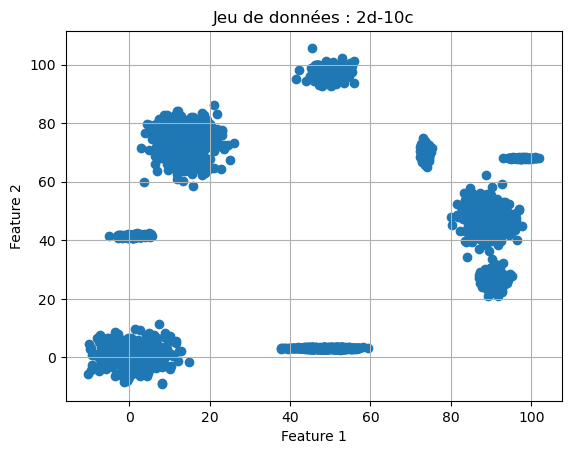

In [3]:
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    # On suppose que la dernière colonne est une étiquette non numérique
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

file_path = os.path.join('../dataset', 'artificial', '2d-10c.arff')

X = load_arff_data(file_path)
print("Shape du dataset :", X.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Jeu de données : 2d-10c")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## K-means : 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score = 0.448


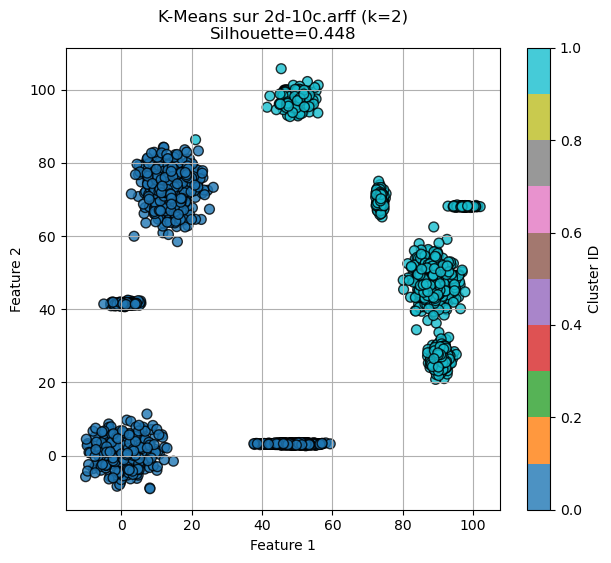

In [4]:


# --- Application de K-Means ---
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)   #on entraine le modèle pour calculer les centres des cluster regrouper les points autour de ces centres et prédicter le cluster de chaque point

# --- Évaluation de la qualité du clustering ---
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score = {silhouette:.3f}")

# --- Affichage des clusters ---
plt.figure(figsize=(7, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
plt.title(f"K-Means sur 2d-10c.arff (k={k})\nSilhouette={silhouette:.3f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

### Exemple Réussi: diamond9.arff avec K = 9 
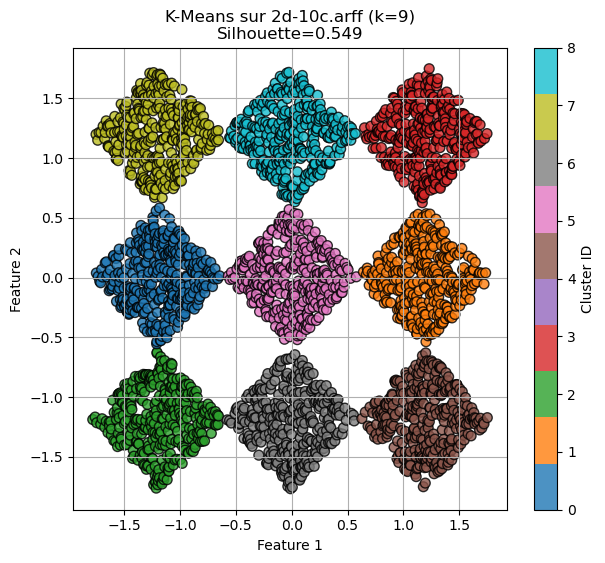


pourquoi ? :

k-means est une méthode qui associe chaque points du dataset au cluster dont le barycentre est le plus proche.
**Elle minimise ainsi la distance intra-cluster**.
Une interprétation possible de cet aspect est que,
cette approche découpe l'espace des points en sections géométrique où chaque point fais partie du même cluster.

Dans l'exemple "diamond9", les clusters sont bien spatialement séparés et géométriquement arrangés.
Ces propriétés font qu'il existe une liste de neufs barycentres tels que les points sont correctement associés à leurs clusters (c'est notre solution).

En revanche pour le cas "2d-10c", ces propriétés ne sont pas vérifiés.
Un cluster attendu, celui du contour, s'étale dans l'espace des point,
si bien qu'il n'existe plus quatres barycentres tels que nous obtenons les clusters attendus.
En conséquence, KMeans vas faire de son mieux et nous donner une mauvaise solution, mais adaptée à notre k d'entrée.


### Explication des avantages de k-mean 

Le but de k-means est de maximiser la similarité intra-cluster, **au mépris de la minimisation de la similarité inter-cluster**.
Cette similarité, comme beaucoup de méthodes, se base sur la fonction distance.
deux points sont considérés similaires si ils sont proche, ainsi maximiser la similarité est équivalent à minimiser la distance.

La conséquence, pour k-means, de ne pas tenir compte de la similarité inter-cluster est que:
Il pourra donner des résultats non qualitatifs sur des jeux de données dont les clusters attendus ne sont pas définissable par des barycentres

### Exemple non Réussi de K-mean banana.arff  k=2


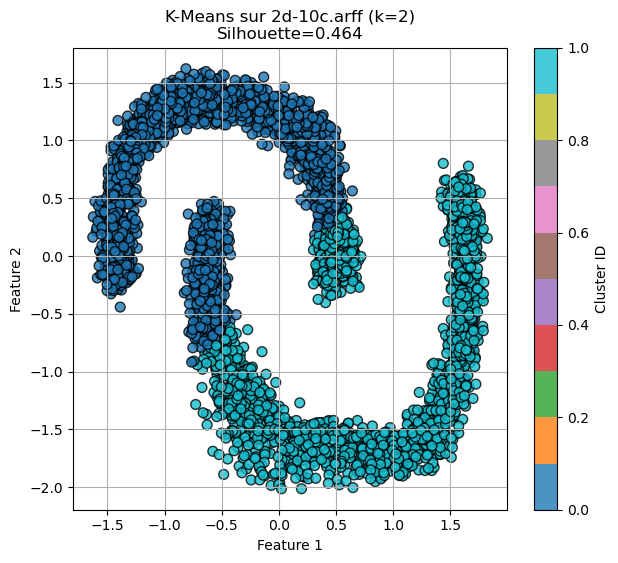*

pourquoi ? :

l'exemple "banana" nous permet de mieux comprendre ce que veux dire un mauvais jeu de donnée pour k-means.
Ici les clusters ne sont pas convexes, et k-means ne sais pas géré cela.
Les barycentres des solutions ne font pas parties des clusters eux mêmes,
et ceux ci sont imbriqué entre eux, venant faire échouer l'évaluation de la similarité intra-cluster.

NB:
Si les deux clusters n'étais pas imbriqués entre eux, l'évaluation de la similarité intra-cluster n'échouerais pas.
Si les clusters étais **bien géométriquement séparés**, aucun soucis ne serais visible.

### Automatisation de choix des paramètres et détection du meilleur DataSet pour K-mean

Shape du dataset : (3000, 2)


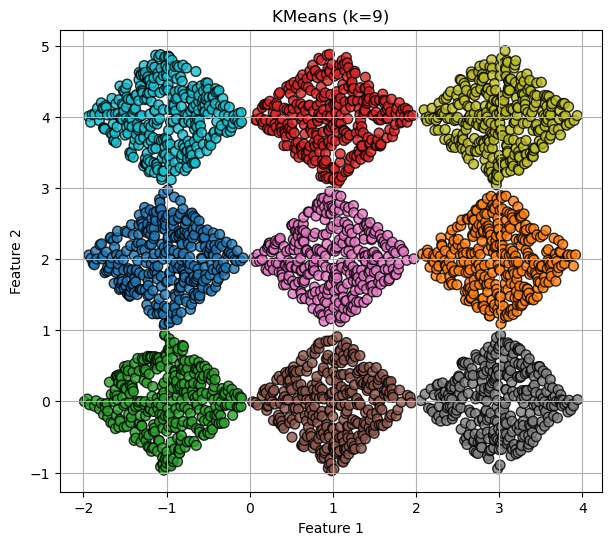

In [9]:
import opti_k_means

def load_arff_data(file_path):
    """Load numeric data from .arff and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)  
    return X

def plot_clusters(data, labels, title):
    plt.figure(figsize=(7, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    arff_file = os.path.join('../dataset', 'artificial', 'diamond9.arff')
    X = load_arff_data(arff_file)
    print("Shape du dataset :", X.shape)



    kmeans, k = opti_k_means.elbow_kmeans(X)
    labels = kmeans.predict(X)

    plot_clusters(X, labels, f"KMeans (k={k})")

Shape du dataset : (3000, 2)
Meilleur k (Silhouette) = 9
Meilleur k (Calinski-Harabasz) = 9
Meilleur k (Davies-Bouldin) = 9


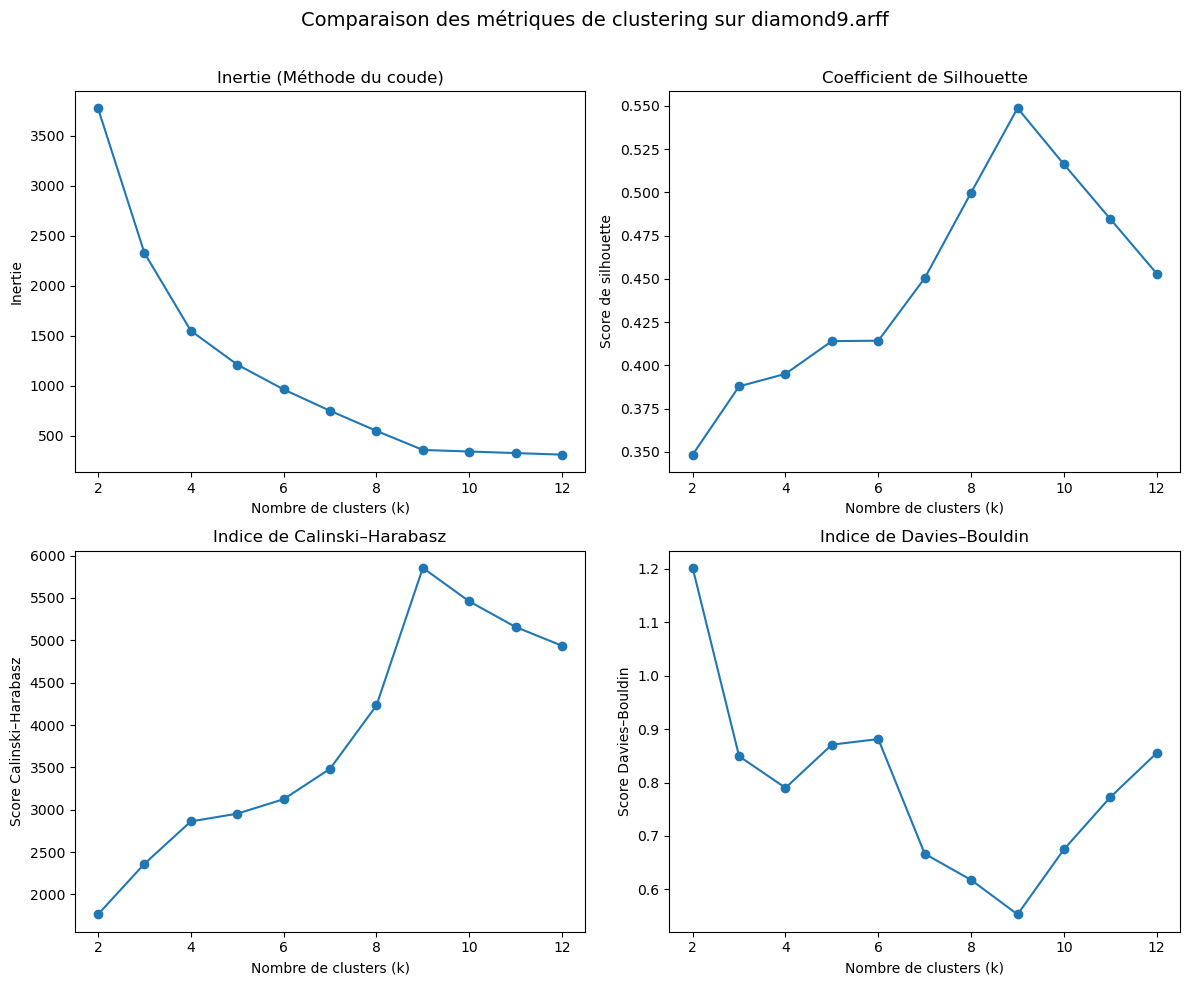

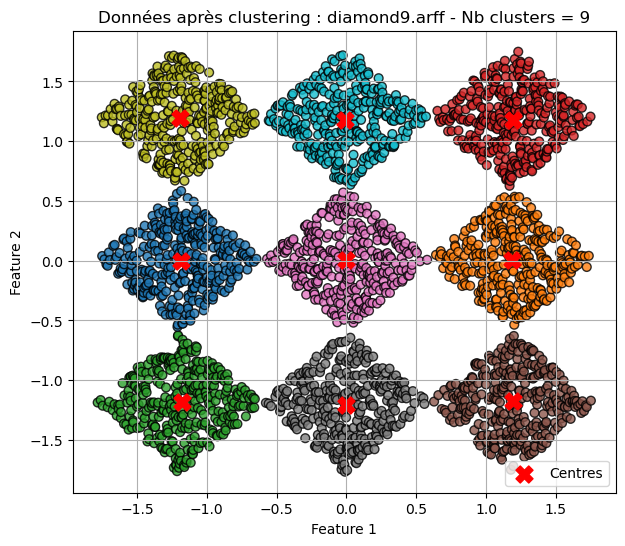

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# --- Chargement du dataset ---
def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X


# --- Fonction d'optimisation complète K-Means ---
def kmeans_metrics_analysis(X, k_min=2, k_max=12):
    inertias = []
    silhouettes = []
    calinski = []
    davies = []

    for k in range(k_min, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))
        calinski.append(calinski_harabasz_score(X, labels))
        davies.append(davies_bouldin_score(X, labels))

    # --- Détermination du meilleur K pour chaque métrique ---
    best_silhouette = np.argmax(silhouettes) + k_min
    best_calinski = np.argmax(calinski) + k_min
    best_davies = np.argmin(davies) + k_min

    print(f"Meilleur k (Silhouette) = {best_silhouette}")
    print(f"Meilleur k (Calinski-Harabasz) = {best_calinski}")
    print(f"Meilleur k (Davies-Bouldin) = {best_davies}")

    # --- Tracés ---
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    ks = range(k_min, k_max + 1)

    # Inertie (Elbow)
    axes[0, 0].plot(ks, inertias, marker='o')
    axes[0, 0].set_title("Inertie (Méthode du coude)")
    axes[0, 0].set_xlabel("Nombre de clusters (k)")
    axes[0, 0].set_ylabel("Inertie")

    # Silhouette
    axes[0, 1].plot(ks, silhouettes, marker='o')
    axes[0, 1].set_title("Coefficient de Silhouette")
    axes[0, 1].set_xlabel("Nombre de clusters (k)")
    axes[0, 1].set_ylabel("Score de silhouette")

    # Calinski-Harabasz
    axes[1, 0].plot(ks, calinski, marker='o')
    axes[1, 0].set_title("Indice de Calinski–Harabasz")
    axes[1, 0].set_xlabel("Nombre de clusters (k)")
    axes[1, 0].set_ylabel("Score Calinski–Harabasz")

    # Davies-Bouldin
    axes[1, 1].plot(ks, davies, marker='o')
    axes[1, 1].set_title("Indice de Davies–Bouldin")
    axes[1, 1].set_xlabel("Nombre de clusters (k)")
    axes[1, 1].set_ylabel("Score Davies–Bouldin")

    plt.suptitle("Comparaison des métriques de clustering sur diamond9.arff", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

    # --- Retourne toutes les métriques pour analyse externe ---
    return {
        "inertias": inertias,
        "silhouette": silhouettes,
        "calinski": calinski,
        "davies": davies
    }


# --- Fonction d'affichage du clustering final ---
def plot_clusters(data, labels, centers, title):
    plt.figure(figsize=(7, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=40, alpha=0.8, edgecolor='k')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='X', label='Centres')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()


# --- Programme principal ---
if __name__ == "__main__":
    arff_file = os.path.join('../dataset', 'artificial', 'diamond9.arff')
    X = load_arff_data(arff_file)
    print("Shape du dataset :", X.shape)

    # --- Standardisation (important) ---
    X = StandardScaler().fit_transform(X)

    # --- Analyse des métriques ---
    results = kmeans_metrics_analysis(X, k_min=2, k_max=12)

    # --- Application finale avec le meilleur K détecté ---
    best_k = 9  # attendu comme meilleur pour diamond9
    kmeans_final = KMeans(n_clusters=best_k, random_state=42)
    labels = kmeans_final.fit_predict(X)

    plot_clusters(X, labels, kmeans_final.cluster_centers_,
                  f"Données après clustering : diamond9.arff - Nb clusters = {best_k}")


## Clustering Agglomératif  

#### Exemple Réussi de Agglomératif : banana.arff avec linkage = single


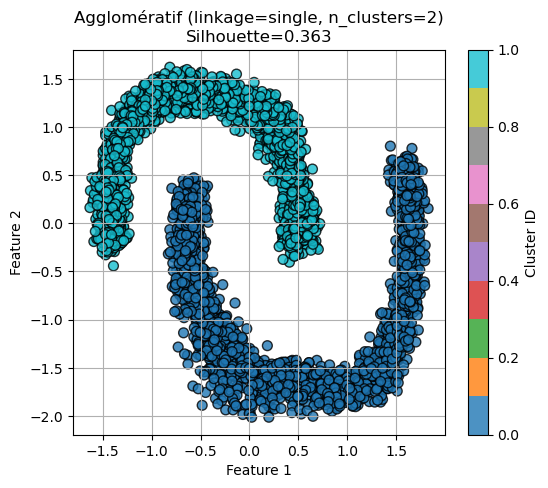

### Comparaison entre les linkages et Analyse

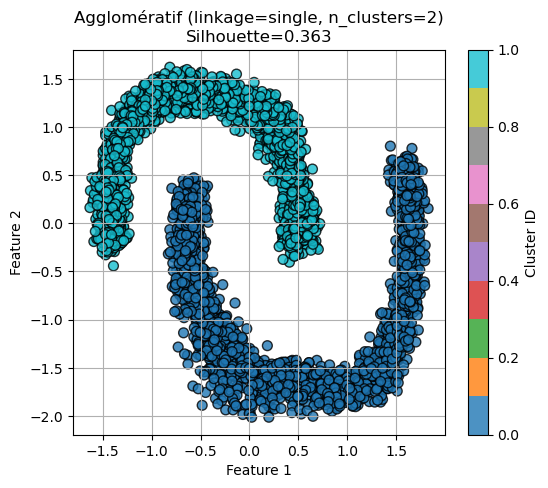
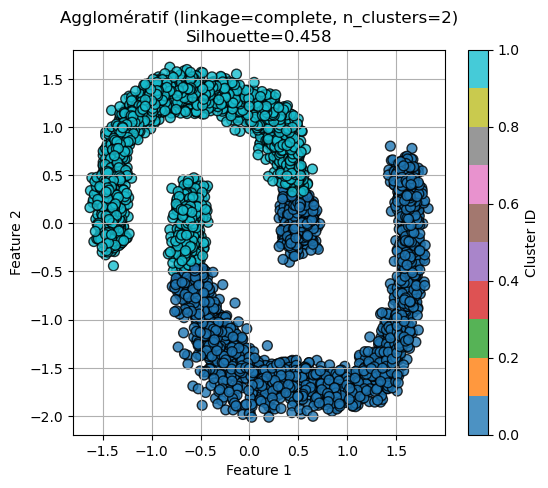
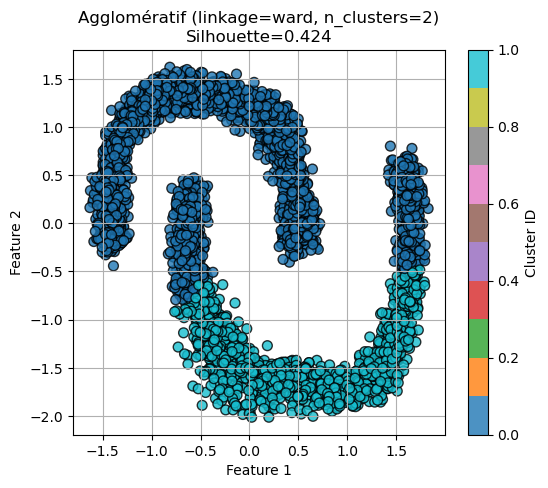
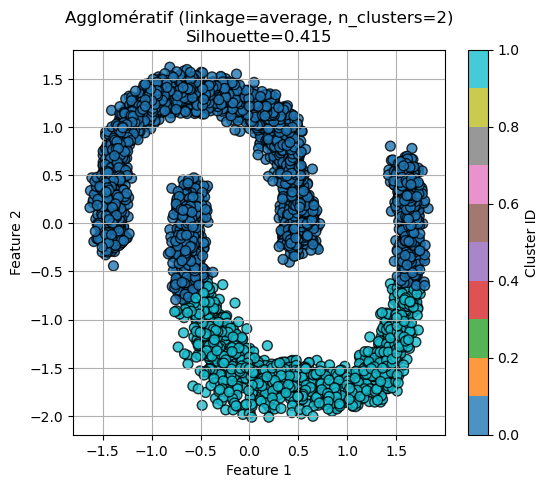



### Interprétation :
Comparaison entre les linkages et analyse
1. Définitions générales

Le clustering hiérarchique agglomératif regroupe progressivement les points en clusters selon une mesure de distance entre groupes, appelée linkage.
La différence entre les méthodes réside dans la manière dont on calcule cette distance inter-groupes.

Type de linkage	   Définition	  Conséquence principale
Single linkage	   Distance minimale entre deux points de clusters différents.  Favorise les chaînes de points proches (effet "chaining"), mais conserve bien les formes convexes.
Complete linkage	  Distance maximale entre deux points de clusters différents.	Produit des clusters compacts et bien séparés, mais sensibles au bruit.
Average linkage	    Moyenne des distances entre tous les points des deux clusters.	Compromis entre single et complete : équilibre entre compacité et flexibilité.
Ward linkage	   Minimise la variance intra-cluster lors de la fusion.	Produit des clusters sphériques, souvent performants sur des données gaussiennes.

2. Analyse des résultats visuels
a. Single linkage
Silhouette = 0.363
Les clusters sont bien séparés le long de la forme en “moons”, ce qui montre que le single linkage parvient à capturer la structure enchaînée et non convexe des données.
Cependant, il peut relier des points éloignés s’il existe une série de points proches entre eux (effet chaîne).
Ici, cet effet est un avantage, car les deux arcs sont continus et le linkage minimal relie efficacement les points de la même courbe.
Conclusion : meilleur choix pour ce dataset (formes non convexes comme “moons”).

b. Complete linkage
Silhouette = 0.458
Le clustering est plus compact mais a tendance à séparer mal certaines parties proches des deux arcs, car il privilégie la distance maximale.
Les clusters sont plus “ronds”, donc moins adaptés à des formes allongées ou enchaînées.
Le score de silhouette est un peu meilleur numériquement, mais visuellement moins pertinent ici.
Conclusion : bon score numérique, mais moins fidèle à la forme réelle.

c. Ward linkage

Silhouette = 0.424
Ward cherche à minimiser la variance intra-cluster, donc il tend à créer des clusters à densité hommogène.
Sur les données en deux lunes, cette approche n’est pas optimale, car la forme n’est pas de densité hommogène.
Les limites des clusters ne suivent pas les courbes naturelles.
Conclusion : adapté à des données isotropes (formes rondes), pas à des structures comme ici.

d. Average linkage

Silhouette = 0.415
Donne un résultat intermédiaire entre single et complete.
Les clusters restent relativement continus tout en évitant les effets de chaîne extrêmes.
Toutefois, il ne suit pas parfaitement la courbure des deux lunes et introduit quelques erreurs de regroupement.
Conclusion : compromis raisonnable, mais pas le plus fidèle à la topologie réelle.

3. Synthèse comparative


| Linkage  | Silhouette | Forme des clusters   | Adapté aux formes non convexes ? | Commentaire |
|-----------|-------------|----------------------|----------------------------------|--------------|
| **Single**   | 0.363 | Allongée, enchaînée | Oui | Capture bien la structure des deux lunes |
| **Complete** | 0.458 | Compacte | Non | Bonne séparation mais structure déformée |
| **Ward**     | 0.424 | forme homogène | Non | Idéal pour des données gaussiennes |
| **Average**  | 0.415 | Intermédiaire | Partiellement | Compromis entre flexibilité et compacité |


4. Conclusion générale

Pour ce dataset en formes non convexes (two moons) :
Le single linkage est le plus pertinent, car il respecte la continuité géométrique des courbes malgré un score de silhouette plus faible.

Pour des jeux de données sphériques ou isotropes :
Ward linkage reste le plus performant, car il minimise efficacement la variance intra-cluster.

Pour des cas mixtes ou bruités :
Average linkage offre un bon compromis entre robustesse et flexibilité.

Shape du dataset : (4811, 2)


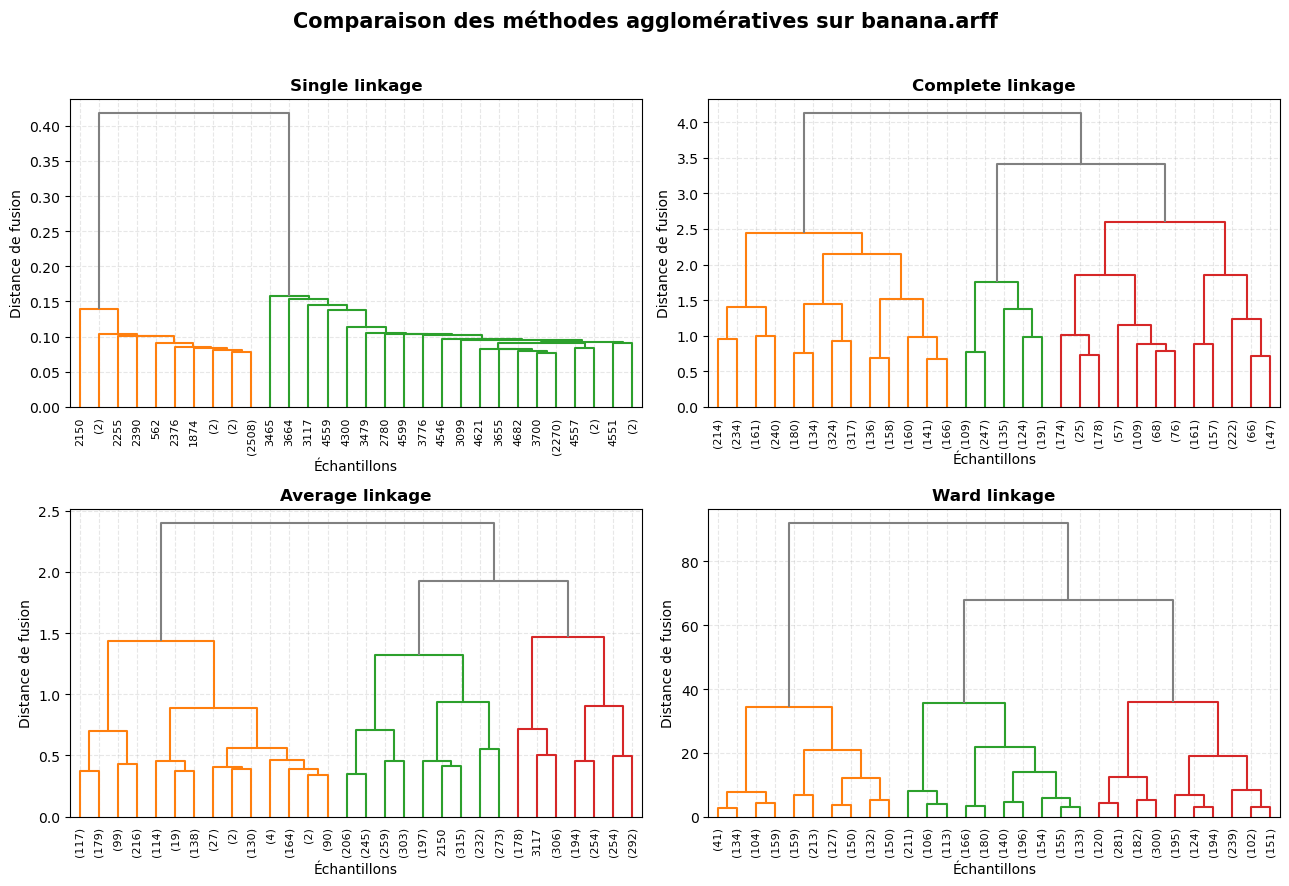

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# --- Chargement des données ---
def load_arff_data(file_path):
    """Charge les données .arff et retourne un tableau NumPy."""
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

# --- Fonction d'affichage d'un dendrogramme ---
def plot_dendrogram_subplot(X, method, ax):
    """Trace un dendrogramme clair dans un sous-graphique donné."""
    Z = linkage(X, method=method)
    dendrogram(
        Z,
        truncate_mode='lastp',   # affiche les dernières fusions
        p=30,                    # nombre de branches à afficher
        leaf_rotation=90,
        leaf_font_size=8,
        color_threshold=None,
        above_threshold_color="gray",
        ax=ax
    )
    ax.set_title(f"{method.capitalize()} linkage", fontsize=12, fontweight='bold')
    ax.set_xlabel("Échantillons")
    ax.set_ylabel("Distance de fusion")
    ax.grid(True, linestyle='--', alpha=0.3)
    return Z

# --- Programme principal ---
if __name__ == "__main__":
    # 1. Chargement et standardisation
    arff_path = os.path.join('../dataset', 'artificial', 'banana.arff')
    X = load_arff_data(arff_path)
    print("Shape du dataset :", X.shape)
    X = StandardScaler().fit_transform(X)

    # 2. Méthodes à comparer
    methods = ['single', 'complete', 'average', 'ward']

    # 3. Figure avec 4 sous-graphiques
    fig, axes = plt.subplots(2, 2, figsize=(13, 9))
    axes = axes.flatten()

    for i, method in enumerate(methods):
        plot_dendrogram_subplot(X, method, axes[i])

    plt.suptitle("Comparaison des méthodes agglomératives sur banana.arff", fontsize=15, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("compAggleo.png", dpi=300, bbox_inches='tight')
    plt.show()


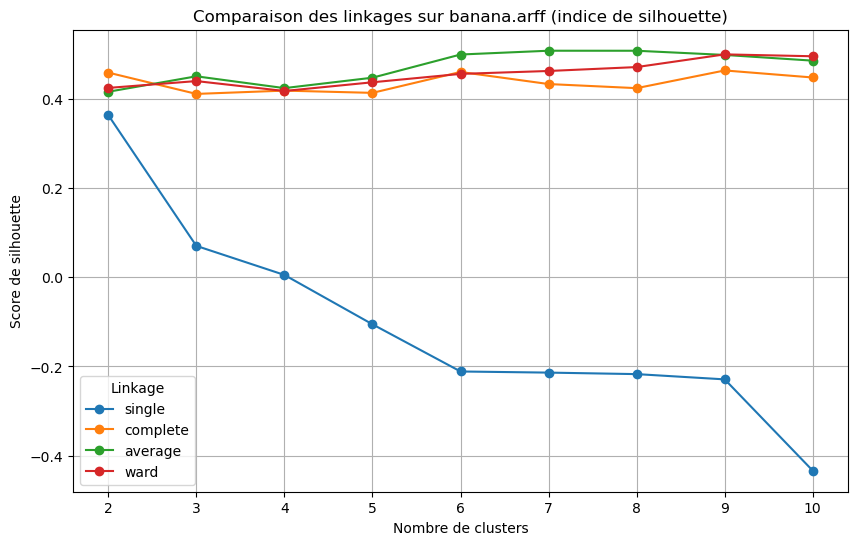

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.io import arff

def load_arff_data(file_path):
    """Load numeric data from a .arff file and return as NumPy array."""
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X


dataset_name = 'banana.arff' 
file_path = os.path.join('../dataset', 'artificial', dataset_name)

X = load_arff_data(file_path)
X = StandardScaler().fit_transform(X)


linkage_list = ['single', 'complete', 'average', 'ward']
n_clusters_range = range(2, 11)  # de 2 à 10 clusters


results = []

for linkage in linkage_list:
    for n_clusters in n_clusters_range:
        # Ward n'accepte que la distance euclidienne
        if linkage == 'ward':
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        
        labels = model.fit_predict(X)
        
        # Calcul des métriques
        silhouette = silhouette_score(X, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        
        results.append({
            'linkage': linkage,
            'n_clusters': n_clusters,
            'silhouette': silhouette,
            'davies_bouldin': db,
            'calinski_harabasz': ch
        })

df_results = pd.DataFrame(results)

# --- Courbe comparant les silhouettes ---
plt.figure(figsize=(10,6))
for linkage in linkage_list:
    subset = df_results[df_results['linkage'] == linkage]
    plt.plot(subset['n_clusters'].values,
             subset['silhouette'].values,
             marker='o',
             label=linkage)

plt.title(f"Comparaison des linkages sur {dataset_name} (indice de silhouette)")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.legend(title="Linkage")
plt.grid(True)
plt.show()

#### Interpretation : 
1. attribution du score pour faire une évaluation : 
    Le score de silhouette mesure la qualité du partitionnement :
    +1 → points bien regroupés et bien séparés
    0 → clusters se chevauchent
    < 0 → points mal attribués
    Objectif : plus le score est élevé, meilleur est le clustering.

2. Lecture générale de la courbe


| Méthode                       | Comportement observé                                                                                             | Interprétation                                                                                                                                           |
| ----------------------------- | ---------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Single linkage (bleu)**     | Démarre à un niveau moyen (~0.37 pour 2 clusters), puis chute rapidement vers des valeurs négatives dès 4 à 10 clusters. | Présente le phénomène de “chaining effect” : les points proches sont reliés en chaînes, ce qui dégrade la cohérence des clusters lorsque leur nombre augmente. |
| **Complete linkage (orange)** | Reste relativement stable (~0.42 à 0.45), peu sensible à la variation du nombre de clusters.                     | Produit des clusters compacts et bien séparés, mais parfois trop rigides, divisant à tort certaines régions continues du dataset.                   |
| **Average linkage (vert)**    | Offre les meilleurs scores de silhouette (~0.45 à 0.49) avec une grande stabilité.                            | Représente un bon compromis entre compacité et flexibilité : capture efficacement les structures globales du dataset banana.arff sans les surfragmenter. |
| **Ward (rouge)**              | Très stable, avec des scores proches de ceux d’Average (~0.46 à 0.48).                                           | Minimise la variance intra-cluster, ce qui est efficace pour des données isotropes ou bien séparées, mais moins adapté aux structures très non linéaires. |

3. Analyse détaillée du comportement
a. Single linkage

Le score silhouette diminue drastiquement avec le nombre de clusters.
Cela traduit le problème classique du single linkage :
Il relie les points en fonction de la plus petite distance entre clusters, créant ainsi de longues chaînes continues.
Sur un dataset comme banana, où les classes forment des bandes allongées et proches, cette stratégie fusionne artificiellement des zones éloignées → d’où la baisse de silhouette.
En résumé : single linkage est très sensible au bruit et inadapté pour les données non convexes ou en “ruban”.

b. le reste des linkages 

Le score est stable mais légèrement inférieur côté complete à Ward et Average.
Ces méthode se base sur la distance maximale entre clusters,la moyenne des distances inter-clusters :La compacité du complete linkage et la flexibilité du single linkage , la minimisation de la variance intra-cluster
Résultat : certains points périphériques sont mal classés, mais la séparation globale reste cohérente.



# DBSCAN

eps=0.05, min_samples=3 -> clusters=45, noise=616
eps=0.05, min_samples=5 -> clusters=10, noise=760
eps=0.05, min_samples=10 -> clusters=42, noise=969
eps=0.05, min_samples=20 -> clusters=47, noise=6464
eps=0.1, min_samples=3 -> clusters=44, noise=118
eps=0.1, min_samples=5 -> clusters=23, noise=306
eps=0.1, min_samples=10 -> clusters=2, noise=512
eps=0.1, min_samples=20 -> clusters=2, noise=562
eps=0.2, min_samples=3 -> clusters=1, noise=0
eps=0.2, min_samples=5 -> clusters=1, noise=0
eps=0.2, min_samples=10 -> clusters=5, noise=31
eps=0.2, min_samples=20 -> clusters=2, noise=268
eps=0.3, min_samples=3 -> clusters=1, noise=0
eps=0.3, min_samples=5 -> clusters=1, noise=0
eps=0.3, min_samples=10 -> clusters=1, noise=0
eps=0.3, min_samples=20 -> clusters=1, noise=16
eps=0.4, min_samples=3 -> clusters=1, noise=0
eps=0.4, min_samples=5 -> clusters=1, noise=0
eps=0.4, min_samples=10 -> clusters=1, noise=0
eps=0.4, min_samples=20 -> clusters=1, noise=0
eps=0.6, min_samples=3 -> clusters=1, n

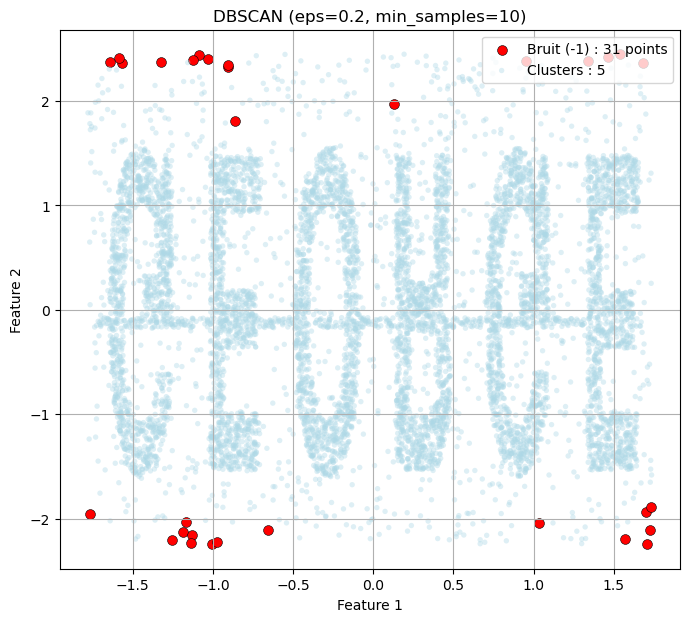

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import os

def load_arff_data(file_path):
    data, meta = arff.loadarff(file_path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

dataset_name = 'cluto-t5-8k.arff' 
file_path = os.path.join('../dataset', 'artificial', dataset_name)

X = load_arff_data(file_path)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1) EXPLORATION DES PARAMÈTRES (juste pour print) ---
for eps_test in [0.05, 0.1, 0.2, 0.3, 0.4, 0.6]:
    for ms_test in [3, 5, 10, 20]:
        dbscan = DBSCAN(eps=eps_test, min_samples=ms_test)
        labels_test = dbscan.fit_predict(X_scaled)
        unique, counts = np.unique(labels_test, return_counts=True)
        n_clusters_test = len(unique) - (1 if -1 in unique else 0)
        noise_test = counts[unique.tolist().index(-1)] if -1 in unique else 0
        print(f"eps={eps_test}, min_samples={ms_test} -> clusters={n_clusters_test}, noise={noise_test}")

# --- 2) CHOIX D’UN COUPLE (eps, min_samples) À VISUALISER ---
eps = 0.2      
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

unique = set(labels)
n_clusters = len(unique) - (1 if -1 in unique else 0)
print(f"\nNombre de clusters trouvés : {n_clusters}")

def evaluate_clustering(X, labels):
    if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in set(labels)):
        return {"silhouette": -1, "calinski_harabasz": -1, "davies_bouldin": -1}
    return {
        "silhouette": silhouette_score(X, labels),
        "calinski_harabasz": calinski_harabasz_score(X, labels),
        "davies_bouldin": davies_bouldin_score(X, labels)
    }

scores = evaluate_clustering(X_scaled, labels)
print(scores)

# --- 3) PLOT AVEC BRUIT EN ROUGE ---
plt.figure(figsize=(8, 7))

mask_noise = labels == -1
mask_cluster = ~mask_noise

plt.scatter(
    X_scaled[mask_noise, 0],
    X_scaled[mask_noise, 1],
    c="red",
    s=50,
    edgecolor="black",
    linewidth=0.4,
    alpha=1.0,
    label=f"Bruit (-1) : {np.sum(mask_noise)} points"
)

plt.scatter(
    X_scaled[mask_cluster, 0],
    X_scaled[mask_cluster, 1],
    c="lightblue",
    s=15,
    edgecolor="none",
    alpha=0.4,
    label=f"Clusters : {n_clusters}"
)

plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# ==========================================================
# === PARAMÈTRES GÉNÉRAUX
# ==========================================================
DATASETS_DIR = "../dataset/artificial"
DATASET_NAME = "cluto-t7-10k.arff"

RESULTS_PATH = "../resultats/DBSCAN"
PLOTS_PATH = os.path.join(RESULTS_PATH, "plots", "comparaison_epsilone")
os.makedirs(PLOTS_PATH, exist_ok=True)

# liste de eps à tester (à adapter si besoin)
EPS_LIST = np.linspace(0.05, 0.25, 9)   # 0.05, 0.075, ..., 0.25
MIN_SAMPLES = 10                        # fixé pour l’expérience
METRIC = "euclidean"


# ==========================================================
# === 1. CHARGEMENT + STANDARDISATION DU DATASET
# ==========================================================
def load_dataset(path):
    """Charge un .arff, garde les colonnes numériques et standardise."""
    data, _ = arff.loadarff(path)
    df = pd.DataFrame(data)
    df = df.select_dtypes(exclude=["object"])  # uniquement numérique
    X = df.values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled


# ==========================================================
# === 2. BOUCLE SUR EPS : DBSCAN + SCORES + PLOTS
# ==========================================================
def analyse_dbscan_epsilon(X):
    results = []

    for eps in EPS_LIST:
        db = DBSCAN(eps=eps, min_samples=MIN_SAMPLES, metric=METRIC)
        labels = db.fit_predict(X)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        n_noise = np.sum(labels == -1)

        # scores par défaut si clustering trivial
        sil = ch = dbi = -1.0

        if n_clusters >= 2:
            sil = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            dbi = davies_bouldin_score(X, labels)

        results.append({
            "eps": eps,
            "min_samples": MIN_SAMPLES,
            "n_clusters": n_clusters,
            "noise": n_noise,
            "silhouette": sil,
            "calinski_harabasz": ch,
            "davies_bouldin": dbi
        })

        # -------- Scatter plot pour cette valeur de eps --------
        fig, ax = plt.subplots(figsize=(7, 6))
        mask_noise = labels == -1
        mask_cluster = ~mask_noise

        # points des clusters
        sc = ax.scatter(
            X[mask_cluster, 0],
            X[mask_cluster, 1],
            c=labels[mask_cluster],
            cmap="tab10",
            s=10,
            edgecolor="none",
            alpha=0.9,
        )

        # bruit en rouge
        ax.scatter(
            X[mask_noise, 0],
            X[mask_noise, 1],
            c="red",
            s=10,
            edgecolor="none",
            alpha=0.8,
            label="Bruit (-1)",
        )

        ax.set_title(
            f"DBSCAN sur cluto-t7-10k\n"
            f"eps={eps:.3f}, min_samples={MIN_SAMPLES} | "
            f"clusters={n_clusters}, noise={n_noise}\n"
            f"Sil={sil:.3f}, CH={ch:.1f}, DB={dbi:.3f}"
        )
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.legend()
        ax.grid(True)

        filename = f"cluto-t7-10k_eps_{eps:.3f}.png".replace(".", "p")
        fig.savefig(os.path.join(PLOTS_PATH, filename), dpi=300)
        plt.close(fig)

        print(
            f"eps={eps:.3f} -> clusters={n_clusters}, noise={n_noise}, "
            f"Sil={sil:.3f}, CH={ch:.1f}, DB={dbi:.3f}"
        )

    return pd.DataFrame(results)


# ==========================================================
# === 3. COURBES DE COMPARAISON DES SCORES VS EPS
# ==========================================================
def plot_scores_vs_epsilon(results_df):
    # tri par eps pour des courbes propres
    results_df = results_df.sort_values("eps")

    eps_vals = results_df["eps"].values
    sil_vals = results_df["silhouette"].values
    ch_vals = results_df["calinski_harabasz"].values
    db_vals = results_df["davies_bouldin"].values
    k_vals = results_df["n_clusters"].values

    # --- Courbe Silhouette ---
    plt.figure(figsize=(8, 5))
    plt.plot(eps_vals, sil_vals, marker="o")
    plt.xlabel("eps")
    plt.ylabel("Silhouette")
    plt.title(f"DBSCAN sur cluto-t7-10k : Silhouette en fonction de eps\n"
              f"(min_samples={MIN_SAMPLES})")
    plt.grid(True)
    plt.savefig(os.path.join(PLOTS_PATH, "silhouette_vs_eps.png"), dpi=300)
    plt.close()

    # --- Courbe Calinski–Harabasz ---
    plt.figure(figsize=(8, 5))
    plt.plot(eps_vals, ch_vals, marker="o")
    plt.xlabel("eps")
    plt.ylabel("Indice de Calinski–Harabasz")
    plt.title(f"DBSCAN sur cluto-t7-10k : CH en fonction de eps\n"
              f"(min_samples={MIN_SAMPLES})")
    plt.grid(True)
    plt.savefig(os.path.join(PLOTS_PATH, "calinski_harabasz_vs_eps.png"), dpi=300)
    plt.close()

    # --- Courbe Davies–Bouldin (plus petit = meilleur) ---
    plt.figure(figsize=(8, 5))
    plt.plot(eps_vals, db_vals, marker="o")
    plt.xlabel("eps")
    plt.ylabel("Indice de Davies–Bouldin")
    plt.title(f"DBSCAN sur cluto-t7-10k : Davies–Bouldin en fonction de eps\n"
              f"(min_samples={MIN_SAMPLES})")
    plt.grid(True)
    plt.savefig(os.path.join(PLOTS_PATH, "davies_bouldin_vs_eps.png"), dpi=300)
    plt.close()

    # --- Nombre de clusters vs eps (montre la fusion des régions) ---
    plt.figure(figsize=(8, 5))
    plt.plot(eps_vals, k_vals, marker="o")
    plt.xlabel("eps")
    plt.ylabel("Nombre de clusters (hors bruit)")
    plt.title(f"DBSCAN sur cluto-t7-10k : nombre de clusters en fonction de eps\n"
              f"(min_samples={MIN_SAMPLES})")
    plt.grid(True)
    plt.savefig(os.path.join(PLOTS_PATH, "clusters_vs_eps.png"), dpi=300)
    plt.close()


# ==========================================================
# === 4. MAIN
# ==========================================================
if __name__ == "__main__":
    file_path = os.path.join(DATASETS_DIR, DATASET_NAME)
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Fichier introuvable : {file_path}")

    X_scaled = load_dataset(file_path)
    results_df = analyse_dbscan_epsilon(X_scaled)

    # Sauvegarde des scores dans un CSV si tu veux les réutiliser
    csv_path = os.path.join(PLOTS_PATH, "scores_eps_cluto-t7-10k.csv")
    results_df.to_csv(csv_path, index=False)
    print(f"\nScores sauvegardés dans : {csv_path}")

    # Courbes globales
    plot_scores_vs_epsilon(results_df)

    print("\nAnalyse DBSCAN / eps terminée pour cluto-t7-10k.")


eps=0.050 -> clusters=18, noise=1029, Sil=-0.204, CH=1173.8, DB=2.631
eps=0.075 -> clusters=9, noise=589, Sil=-0.194, CH=880.4, DB=2.109
eps=0.100 -> clusters=7, noise=322, Sil=-0.188, CH=598.9, DB=2.340
eps=0.125 -> clusters=4, noise=135, Sil=-0.191, CH=17.8, DB=3.467
eps=0.150 -> clusters=1, noise=48, Sil=-1.000, CH=-1.0, DB=-1.000
eps=0.175 -> clusters=1, noise=6, Sil=-1.000, CH=-1.0, DB=-1.000
eps=0.200 -> clusters=1, noise=1, Sil=-1.000, CH=-1.0, DB=-1.000
eps=0.225 -> clusters=1, noise=0, Sil=-1.000, CH=-1.0, DB=-1.000
eps=0.250 -> clusters=1, noise=0, Sil=-1.000, CH=-1.0, DB=-1.000

Scores sauvegardés dans : ../resultats/DBSCAN/plots/comparaison_epsilone/scores_eps_cluto-t7-10k.csv

Analyse DBSCAN / eps terminée pour cluto-t7-10k.


Couples trouvés donnant exactement 9 clusters :
eps=0.059, min_samples=11, noise=816
eps=0.059, min_samples=12, noise=847
eps=0.067, min_samples=10, noise=684
eps=0.067, min_samples=11, noise=707
eps=0.067, min_samples=12, noise=732
eps=0.067, min_samples=13, noise=759
eps=0.067, min_samples=14, noise=780
eps=0.067, min_samples=15, noise=793
eps=0.067, min_samples=16, noise=815
eps=0.067, min_samples=17, noise=871
eps=0.067, min_samples=38, noise=9558
eps=0.076, min_samples=9, noise=553
eps=0.076, min_samples=10, noise=583
eps=0.076, min_samples=12, noise=646
eps=0.076, min_samples=13, noise=667
eps=0.076, min_samples=14, noise=675
eps=0.076, min_samples=15, noise=684
eps=0.076, min_samples=16, noise=705
eps=0.076, min_samples=17, noise=722
eps=0.076, min_samples=18, noise=736
eps=0.076, min_samples=19, noise=752
eps=0.076, min_samples=20, noise=772
eps=0.076, min_samples=21, noise=803
eps=0.084, min_samples=20, noise=666
eps=0.084, min_samples=21, noise=679
eps=0.084, min_samples=22, 

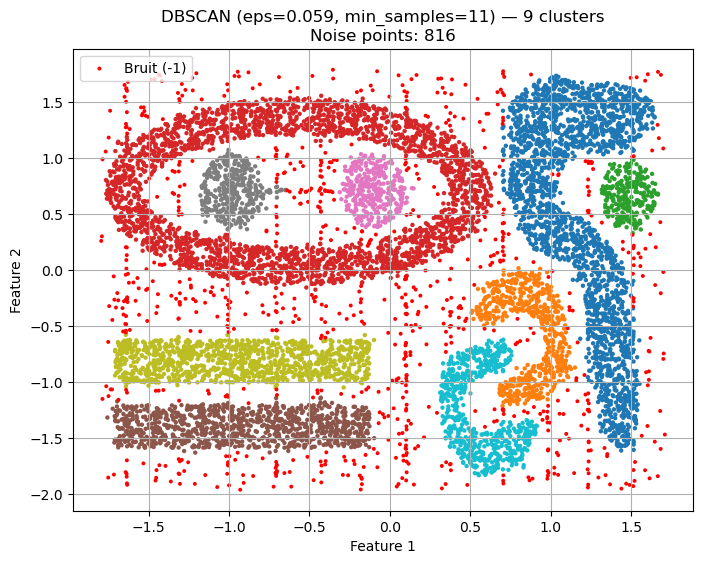

In [9]:
import os
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# -------- Chargement dataset --------
dataset_name = 'cluto-t7-10k.arff'
file_path = os.path.join('../dataset', 'artificial', dataset_name)

def load_arff(path):
    data, meta = arff.loadarff(path)
    return np.array([list(row)[:-1] for row in data], dtype=float)

X = load_arff(file_path)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------- Recherche de paramètres pour obtenir 9 clusters --------
target_clusters = 9

best_params = []
results = []

eps_values = np.linspace(0.05, 0.30, 30)
min_samples_values = range(3, 41)

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)

        unique = set(labels)
        n_clusters = len(unique) - (1 if -1 in unique else 0)

        if n_clusters == target_clusters:
            noise = np.sum(labels == -1)
            results.append((eps, ms, noise, labels))

# -------- Affichage des résultats trouvés --------
if len(results) == 0:
    print("Aucun couple (eps, min_samples) ne donne exactement 9 clusters.")
else:
    print("Couples trouvés donnant exactement 9 clusters :")
    for eps, ms, noise, _ in results:
        print(f"eps={eps:.3f}, min_samples={ms}, noise={noise}")

    # On prend le premier couple
    eps, min_samples, noise, labels = results[0]
    print(f"\nParamètres retenus = eps={eps:.3f}, min_samples={min_samples}")

    # -------- Plot du clustering --------
    plt.figure(figsize=(8, 6))

    mask_noise = labels == -1
    mask_cluster = ~mask_noise

    plt.scatter(X_scaled[mask_cluster, 0], X_scaled[mask_cluster, 1],
                c=labels[mask_cluster], cmap='tab10', s=10, edgecolor='none')

    plt.scatter(X_scaled[mask_noise, 0], X_scaled[mask_noise, 1],
                c='red', s=8, label='Bruit (-1)', edgecolor='none')

    plt.title(f"DBSCAN (eps={eps:.3f}, min_samples={min_samples}) — 9 clusters\n"
              f"Noise points: {noise}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()


In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

from analysis_plots import plot_silhouette_clusters  # on réutilise ta fonction

# ==========================================================
# === PARAMÈTRES GÉNÉRAUX
# ==========================================================
DATASETS_DIR = "../dataset/artificial"

RESULTS_PATH = "../resultats/DBSCAN"
PLOTS_PATH = os.path.join(RESULTS_PATH, "plots")
FULL_SCORES_PATH = os.path.join(RESULTS_PATH, "full_scores")
GLOBAL_CSV_PATH = os.path.join(RESULTS_PATH, "best_scores.csv")

# Création des dossiers nécessaires
os.makedirs(RESULTS_PATH, exist_ok=True)
os.makedirs(PLOTS_PATH, exist_ok=True)
os.makedirs(FULL_SCORES_PATH, exist_ok=True)

# Initialisation du CSV global s’il n’existe pas
if not os.path.exists(GLOBAL_CSV_PATH):
    pd.DataFrame(columns=[
        "dataset",
        "metric_eval",
        "eps",
        "min_samples",
        "metric",
        "score"
    ]).to_csv(GLOBAL_CSV_PATH, index=False)


# ==========================================================
# === 1. CHARGEMENT + STANDARDISATION DU DATASET
# ==========================================================
def load_dataset(file_path):
    """Charge un ARFF, garde les colonnes numériques et standardise les données."""
    data, _ = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    df = df.select_dtypes(exclude=["object"])  # uniquement numérique
    X = df.values

    # Standardisation : très importante pour DBSCAN
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled


# ==========================================================
# === 2. TEST DE TOUTES LES COMBINAISONS DE PARAMÈTRES
# ==========================================================
def test_hyperparameters(X):
    """Teste une grille de (eps, min_samples) pour DBSCAN."""

    # À adapter si besoin
    eps_list = np.linspace(0.05, 0.30, 15)
    min_samples_list = [2, 5, 10, 20]
    metric = "euclidean"

    results = []

    for eps in eps_list:
        for ms in min_samples_list:
            try:
                db = DBSCAN(eps=eps, min_samples=ms, metric=metric)
                labels = db.fit_predict(X)
            except Exception as e:
                print(f"Skipping eps={eps:.3f}, min_samples={ms} ({e})")
                continue

            # Nombre de clusters (hors bruit)
            unique_labels = set(labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

            # On ignore les solutions triviales
            if n_clusters < 2:
                print(f"Ignored eps={eps:.3f}, min_samples={ms} -> {n_clusters} cluster(s)")
                continue

            try:
                sil = silhouette_score(X, labels)
                ch = calinski_harabasz_score(X, labels)
                dbi = davies_bouldin_score(X, labels)
            except Exception:
                print(f"Scores non calculables pour eps={eps:.3f}, min_samples={ms}")
                continue

            results.append({
                "eps": eps,
                "min_samples": ms,
                "metric": metric,
                "silhouette": sil,
                "calinski_harabasz": ch,
                "davies_bouldin": dbi,
                "n_clusters": n_clusters
            })

    return pd.DataFrame(results)


# ==========================================================
# === 3. ENREGISTREMENT DES RÉSULTATS
# ==========================================================
def save_full_results(dataset_name, results_df):
    """Sauvegarde le CSV complet des scores."""
    csv_path = os.path.join(FULL_SCORES_PATH, f"{dataset_name}_results.csv")
    results_df.to_csv(csv_path, index=False)
    print(f"Résultats complets sauvegardés : {csv_path}")


# ==========================================================
# === 4. EXTRACTION DES MEILLEURS MODÈLES
# ==========================================================
def get_best_models(results_df):
    """Retourne les meilleures configurations pour chaque métrique."""
    return {
        "silhouette": results_df.loc[results_df["silhouette"].idxmax()],
        "calinski_harabasz": results_df.loc[results_df["calinski_harabasz"].idxmax()],
        "davies_bouldin": results_df.loc[results_df["davies_bouldin"].idxmin()],
    }


# ==========================================================
# === 5. PLOTS DES MEILLEURS MODÈLES
# ==========================================================
def plot_clusters(X, dataset_name, params, metric_name):
    """Scatter plot des clusters DBSCAN avec bruit en rouge."""
    eps = float(params["eps"])
    ms = int(params["min_samples"])
    metric = params["metric"]

    db = DBSCAN(eps=eps, min_samples=ms, metric=metric).fit(X)
    labels = db.labels_

    mask_noise = labels == -1
    mask_cluster = ~mask_noise

    plt.figure(figsize=(8, 6))
    # points des clusters
    plt.scatter(
        X[mask_cluster, 0],
        X[mask_cluster, 1],
        c=labels[mask_cluster],
        cmap="tab10",
        s=10,
        edgecolor="none",
        alpha=0.9,
    )
    # bruit en rouge
    plt.scatter(
        X[mask_noise, 0],
        X[mask_noise, 1],
        c="red",
        s=10,
        edgecolor="none",
        alpha=0.8,
        label="Bruit (-1)",
    )

    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = np.sum(mask_noise)

    plt.title(
        f"{dataset_name} — {metric_name}\n"
        f"DBSCAN (eps={eps:.3f}, min_samples={ms}) — "
        f"clusters={n_clusters}, noise={n_noise}"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()

    metric_plot_dir = os.path.join(PLOTS_PATH, metric_name)
    os.makedirs(metric_plot_dir, exist_ok=True)

    filename = f"{dataset_name}_{metric_name}.png"
    plt.savefig(os.path.join(metric_plot_dir, filename), dpi=300)
    plt.close()

    print(f"Plot '{metric_name}' sauvegardé : {filename}")


def plot_dbscan_analysis(X, dataset_name, params, metric_name):
    """Pour DBSCAN : on génère surtout le plot de silhouette."""
    eps = float(params["eps"])
    ms = int(params["min_samples"])
    metric = params["metric"]

    db = DBSCAN(eps=eps, min_samples=ms, metric=metric).fit(X)
    labels = db.labels_

    # Dossier d'analyse
    metric_dir = os.path.join(PLOTS_PATH, metric_name)
    analysis_dir = os.path.join(metric_dir, "analysis")
    os.makedirs(analysis_dir, exist_ok=True)

    # Silhouette plot
    sil_dir = os.path.join(analysis_dir, "silhouette")
    os.makedirs(sil_dir, exist_ok=True)
    plot_silhouette_clusters(
        X,
        labels,
        savepath=os.path.join(sil_dir, f"{dataset_name}_silhouette.png")
    )


# ==========================================================
# === 6. MISE À JOUR DU CSV GLOBAL
# ==========================================================
def update_global_csv(dataset_name, best_models):
    """Ajoute les meilleurs modèles DBSCAN dans le CSV global."""
    global_df = pd.read_csv(GLOBAL_CSV_PATH)
    new_rows = []

    for metric_name, params in best_models.items():
        new_rows.append({
            "dataset": dataset_name,
            "metric_eval": metric_name,
            "eps": float(params["eps"]),
            "min_samples": int(params["min_samples"]),
            "metric": params["metric"],
            "score": float(params[metric_name]),
        })

    global_df = pd.concat([global_df, pd.DataFrame(new_rows)], ignore_index=True)
    global_df.to_csv(GLOBAL_CSV_PATH, index=False)
    print(f"Meilleurs scores ajoutés à {GLOBAL_CSV_PATH}")


# ==========================================================
# === 7. PIPELINE PRINCIPAL
# ==========================================================
def run_dbscan_experiment(file_path):
    dataset_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"\nTraitement du dataset : {dataset_name}")

    X = load_dataset(file_path)
    results_df = test_hyperparameters(X)
    save_full_results(dataset_name, results_df)
    best_models = get_best_models(results_df)

    for metric_name, params in best_models.items():
        plot_clusters(X, dataset_name, params, metric_name)
        plot_dbscan_analysis(X, dataset_name, params, metric_name)

    update_global_csv(dataset_name, best_models)


# ==========================================================
# === 8. EXÉCUTION UNIQUEMENT SUR cluto-t7-10k.arff
# ==========================================================
if __name__ == "__main__":
    dataset_name = "cluto-t7-10k.arff"
    file_path = os.path.join(DATASETS_DIR, dataset_name)

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Fichier introuvable : {file_path}")

    run_dbscan_experiment(file_path)
    print("\nTraitement DBSCAN terminé pour cluto-t7-10k.arff.")



Traitement du dataset : cluto-t7-10k
Ignored eps=0.139, min_samples=5 -> 1 cluster(s)
Ignored eps=0.157, min_samples=2 -> 1 cluster(s)
Ignored eps=0.157, min_samples=5 -> 1 cluster(s)
Ignored eps=0.175, min_samples=2 -> 1 cluster(s)
Ignored eps=0.175, min_samples=5 -> 1 cluster(s)
Ignored eps=0.175, min_samples=10 -> 1 cluster(s)
Ignored eps=0.175, min_samples=20 -> 1 cluster(s)
Ignored eps=0.193, min_samples=2 -> 1 cluster(s)
Ignored eps=0.193, min_samples=5 -> 1 cluster(s)
Ignored eps=0.193, min_samples=10 -> 1 cluster(s)
Ignored eps=0.193, min_samples=20 -> 1 cluster(s)
Ignored eps=0.211, min_samples=2 -> 1 cluster(s)
Ignored eps=0.211, min_samples=5 -> 1 cluster(s)
Ignored eps=0.211, min_samples=10 -> 1 cluster(s)
Ignored eps=0.211, min_samples=20 -> 1 cluster(s)
Ignored eps=0.229, min_samples=2 -> 1 cluster(s)
Ignored eps=0.229, min_samples=5 -> 1 cluster(s)
Ignored eps=0.229, min_samples=10 -> 1 cluster(s)
Ignored eps=0.229, min_samples=20 -> 1 cluster(s)
Ignored eps=0.246, min_

/tmp/ipykernel_28286/103542908.py:237: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  global_df = pd.concat([global_df, pd.DataFrame(new_rows)], ignore_index=True)


Meilleurs paramètres (CH max) : eps=0.104, min_samples=15
Score CH = 3051.08
Nombre de clusters = 5, nombre de points de bruit = 219


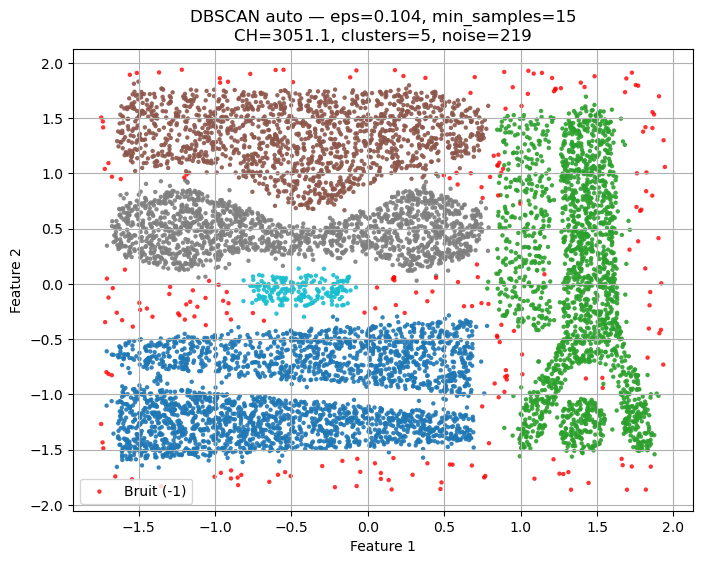

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# ---------- 1) Chargement + standardisation ----------
dataset_name = "cluto-t8-8k.arff"   # <-- change ici si tu veux un autre jeu
file_path = os.path.join("../dataset", "artificial", dataset_name)

def load_arff(path):
    data, meta = arff.loadarff(path)
    X = np.array([list(row)[:-1] for row in data], dtype=float)
    return X

X = load_arff(file_path)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- 2) Grille de paramètres pour DBSCAN ----------
eps_values = np.linspace(0.05, 0.30, 15)   
min_samples_values = range(2, 21)          

best_score = -1
best_params = None
best_labels = None

results = []   # pour garder tout l’historique

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        if n_clusters >= 2:
            ch = calinski_harabasz_score(X_scaled, labels)
        else:
            ch = -1  # clustering trivial

        results.append((eps, ms, n_clusters, ch))

        if ch > best_score:
            best_score = ch
            best_params = (eps, ms)
            best_labels = labels

print(f"Meilleurs paramètres (CH max) : eps={best_params[0]:.3f}, min_samples={best_params[1]}")
print(f"Score CH = {best_score:.2f}")

# Info sur le meilleur clustering
unique_best = set(best_labels)
n_clusters_best = len(unique_best) - (1 if -1 in unique_best else 0)
n_noise_best = np.sum(best_labels == -1)
print(f"Nombre de clusters = {n_clusters_best}, nombre de points de bruit = {n_noise_best}")

# ---------- 3) Visualisation avec les meilleurs paramètres ----------
plt.figure(figsize=(8, 6))
mask_noise = best_labels == -1
mask_cluster = ~mask_noise

plt.scatter(
    X_scaled[mask_cluster, 0],
    X_scaled[mask_cluster, 1],
    c=best_labels[mask_cluster],
    cmap="tab10",
    s=10,
    edgecolor="none",
    alpha=0.9,
)

plt.scatter(
    X_scaled[mask_noise, 0],
    X_scaled[mask_noise, 1],
    c="red",
    s=10,
    edgecolor="none",
    alpha=0.8,
    label="Bruit (-1)",
)

plt.title(f"DBSCAN auto — eps={best_params[0]:.3f}, min_samples={best_params[1]}\n"
          f"CH={best_score:.1f}, clusters={n_clusters_best}, noise={n_noise_best}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


label -1: 67 points
label 0: 1809 points
label 1: 425 points
label 2: 418 points
label 3: 1481 points
Après filtrage :
clusters = 4 , noise = 67


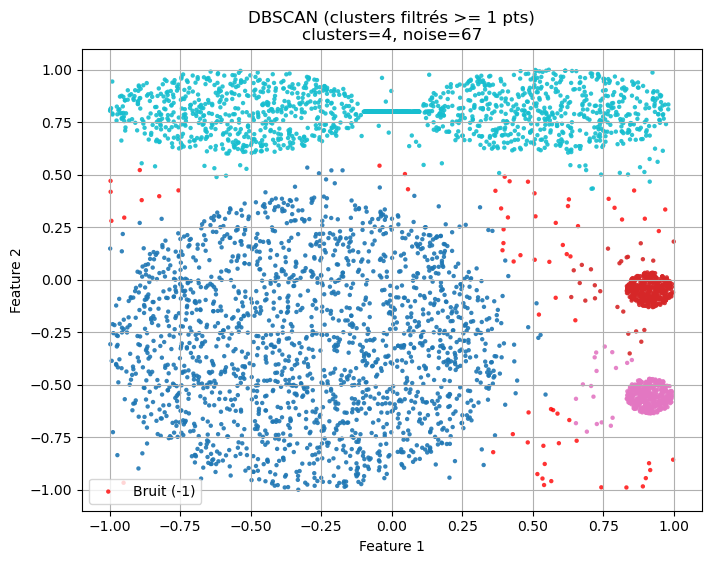

In [23]:
import numpy as np

unique, counts = np.unique(best_labels, return_counts=True)
for lbl, c in zip(unique, counts):
    print(f"label {lbl}: {c} points")


min_cluster_size = 1

labels_filtered = best_labels.copy()
unique, counts = np.unique(labels_filtered, return_counts=True)

small_labels = [lbl for lbl, c in zip(unique, counts)
                if lbl != -1 and c < min_cluster_size]

for lbl in small_labels:
    labels_filtered[labels_filtered == lbl] = -1

# Nouveau nombre de clusters / bruit
unique_filt = set(labels_filtered)
n_clusters_filt = len(unique_filt) - (1 if -1 in unique_filt else 0)
n_noise_filt = np.sum(labels_filtered == -1)

print("Après filtrage :")
print("clusters =", n_clusters_filt, ", noise =", n_noise_filt)


mask_noise = labels_filtered == -1
mask_cluster = ~mask_noise

plt.figure(figsize=(8, 6))
plt.scatter(
    X[mask_cluster, 0],
    X[mask_cluster, 1],
    c=labels_filtered[mask_cluster],
    cmap="tab10",
    s=10,
    edgecolor="none",
    alpha=0.9,
)
plt.scatter(
    X[mask_noise, 0],
    X[mask_noise, 1],
    c="red",
    s=10,
    edgecolor="none",
    alpha=0.8,
    label="Bruit (-1)",
)
plt.title(f"DBSCAN (clusters filtrés >= {min_cluster_size} pts)\n"
          f"clusters={n_clusters_filt}, noise={n_noise_filt}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.metrics import silhouette_score
import pandas as pd
import hdbscan
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from itertools import product

from analysis_plots import plot_hdbscan_condensed_tree, plot_silhouette_clusters

# ==========================================================
# === PARAMÈTRES GÉNÉRAUX
# ==========================================================
DATASETS_DIR = "../dataset/artificial"
RESULTS_PATH = "../resultats/HDBSCAN"
PLOTS_PATH = os.path.join(RESULTS_PATH, "plots")
FULL_SCORES_PATH = os.path.join(RESULTS_PATH, "full_scores")
GLOBAL_CSV_PATH = os.path.join(RESULTS_PATH, "best_scores.csv")

# Création des dossiers nécessaires
os.makedirs(RESULTS_PATH, exist_ok=True)
os.makedirs(PLOTS_PATH, exist_ok=True)
os.makedirs(FULL_SCORES_PATH, exist_ok=True)

# Liste des fichiers à ignorer
IGNORE_DATASETS = ["birch-rg1.arff", "birch-rg3.arff"]

# Initialisation du CSV global s’il n’existe pas
if not os.path.exists(GLOBAL_CSV_PATH):
    pd.DataFrame(columns=[
        "dataset",
        "metric_eval",
        "min_cluster_size",
        "min_samples",
        "metric",
        "cluster_selection_method",
        "score"
    ]).to_csv(GLOBAL_CSV_PATH, index=False)


# ==========================================================
# === 1. CHARGEMENT DU DATASET
# ==========================================================
def load_dataset(file_path):
    """Charge un fichier ARFF et retourne un tableau numpy."""
    data, _ = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    # On garde uniquement les colonnes numériques
    df = df.select_dtypes(exclude=["object"])
    return df.values


# ==========================================================
# === 2. TEST DE TOUTES LES COMBINAISONS DE PARAMÈTRES
# ==========================================================
def test_hyperparameters(X):
    """Teste toutes les combinaisons de paramètres pour HDBSCAN."""
    min_cluster_size_list = [2, 5, 10]
    min_samples_list = [None, 5, 10]
    metric_list = ["euclidean", "manhattan"]
    cluster_selection_method_list = ["eom", "leaf"]

    results = []

    for min_cluster_size, min_samples, metric, method in product(
        min_cluster_size_list, min_samples_list, metric_list, cluster_selection_method_list
    ):
        try:
            clustering = hdbscan.HDBSCAN(
                min_cluster_size=min_cluster_size,
                min_samples=min_samples,
                metric=metric,
                cluster_selection_method=method
            )
            labels = clustering.fit_predict(X)
        except Exception as e:
            print(
                f" Skipping: size={min_cluster_size}, samples={min_samples}, "
                f"metric={metric}, method={method} ({e})"
            )
            continue

        n_unique = len(np.unique(labels))
        if n_unique <= 1 or n_unique == len(X):
            print(f" Ignored: produit {n_unique} clusters")
            continue

        try:
            sil = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            db = davies_bouldin_score(X, labels)
        except Exception:
            print(
                f" Scores non calculables pour size={min_cluster_size}, metric={metric}"
            )
            continue

        results.append({
            "min_cluster_size": min_cluster_size,
            "min_samples": min_samples,
            "metric": metric,
            "cluster_selection_method": method,
            "silhouette": sil,
            "calinski_harabasz": ch,
            "davies_bouldin": db
        })

    return pd.DataFrame(results)


# ==========================================================
# === 3. ENREGISTREMENT DES RÉSULTATS
# ==========================================================
def save_full_results(dataset_name, results_df):
    """Sauvegarde le CSV complet des scores."""
    csv_path = os.path.join(FULL_SCORES_PATH, f"{dataset_name}_results.csv")
    results_df.to_csv(csv_path, index=False)
    print(f" Résultats complets sauvegardés : {csv_path}")


# ==========================================================
# === 4. EXTRACTION DES MEILLEURS MODÈLES
# ==========================================================
def get_best_models(results_df):
    """Retourne les meilleures configurations pour chaque métrique."""
    return {
        "silhouette": results_df.loc[results_df["silhouette"].idxmax()],
        "calinski_harabasz": results_df.loc[results_df["calinski_harabasz"].idxmax()],
        "davies_bouldin": results_df.loc[results_df["davies_bouldin"].idxmin()],
    }


# ==========================================================
# === 5. PLOTS DES MEILLEURS MODÈLES
# ==========================================================
def plot_clusters(X, dataset_name, params, metric_name):
    """Génère et enregistre un scatter plot des clusters."""
    clustering = hdbscan.HDBSCAN(
        min_cluster_size=int(params["min_cluster_size"]),
        min_samples=None if pd.isna(params["min_samples"]) else int(params["min_samples"]),
        metric=params["metric"],
        cluster_selection_method=params["cluster_selection_method"]
    ).fit(X)

    labels = clustering.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=50)
    plt.title(
        f"{dataset_name} — {metric_name} "
        f"(size={params['min_cluster_size']}, samples={params['min_samples']}, "
        f"{params['metric']}, {params['cluster_selection_method']})"
    )
    plt.tight_layout()

    metric_plot_dir = os.path.join(PLOTS_PATH, metric_name)
    os.makedirs(metric_plot_dir, exist_ok=True)

    filename = f"{dataset_name}_{metric_name}.png"
    plt.savefig(os.path.join(metric_plot_dir, filename), dpi=300)
    plt.close()

    print(f" Plot '{metric_name}' sauvegardé : {filename}")


def plot_hdbscan_analysis(X, dataset_name, params, metric_name, results_df=None):
    """
    Génère tous les plots d'analyse pour HDBSCAN :
    - Silhouette plot
    - Condensed tree
    """
    clustering = hdbscan.HDBSCAN(
        min_cluster_size=int(params["min_cluster_size"]),
        min_samples=None if pd.isna(params["min_samples"]) else int(params["min_samples"]),
        metric=params["metric"],
        cluster_selection_method=params["cluster_selection_method"]
    ).fit(X)
    labels = clustering.labels_

    metric_dir = os.path.join(PLOTS_PATH, metric_name)
    analysis_dir = os.path.join(metric_dir, "analysis")
    os.makedirs(analysis_dir, exist_ok=True)

    # 2️ Silhouette
    sil_dir = os.path.join(analysis_dir, "silhouette")
    os.makedirs(sil_dir, exist_ok=True)
    plot_silhouette_clusters(
        X, labels,
        savepath=os.path.join(sil_dir, f"{dataset_name}_silhouette.png")
    )

    # 3️ Condensed tree
    tree_dir = os.path.join(analysis_dir, "condensed_tree")
    os.makedirs(tree_dir, exist_ok=True)
    plot_hdbscan_condensed_tree(
        clustering,
        savepath=os.path.join(tree_dir, f"{dataset_name}_condensed_tree.png")
    )


# ==========================================================
# === 6. MISE À JOUR DU CSV GLOBAL
# ==========================================================
def update_global_csv(dataset_name, best_models):
    """Ajoute les meilleurs modèles dans le CSV global."""
    global_df = pd.read_csv(GLOBAL_CSV_PATH)
    new_rows = []

    for metric_name, params in best_models.items():
        new_rows.append({
            "dataset": dataset_name,
            "metric_eval": metric_name,
            "min_cluster_size": int(params["min_cluster_size"]),
            "min_samples": params["min_samples"],
            "metric": params["metric"],
            "cluster_selection_method": params["cluster_selection_method"],
            "score": params[metric_name]
        })

    global_df = pd.concat([global_df, pd.DataFrame(new_rows)], ignore_index=True)
    global_df.to_csv(GLOBAL_CSV_PATH, index=False)
    print(f" Meilleurs scores ajoutés à {GLOBAL_CSV_PATH}")


def run_hdbscan_experiment(file_path):
    dataset_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"\n Traitement du dataset : {dataset_name}")

    X = load_dataset(file_path)
    results_df = test_hyperparameters(X)
    save_full_results(dataset_name, results_df)
    best_models = get_best_models(results_df)

    for metric_name, params in best_models.items():
        plot_clusters(X, dataset_name, params, metric_name)
        plot_hdbscan_analysis(X, dataset_name, params, metric_name, results_df)

    update_global_csv(dataset_name, best_models)


# ==========================================================
# === 8. EXÉCUTION UNIQUEMENT SUR cluto-t5-8k.arff
# ==========================================================
if __name__ == "__main__":
    dataset_name = "cluto-t5-8k.arff"
    file_path = os.path.join(DATASETS_DIR, dataset_name)

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Fichier introuvable : {file_path}")

    run_hdbscan_experiment(file_path)
    print("\nTraitement HDBSCAN terminé pour cluto-t5-8k.arff.")



 Traitement du dataset : cluto-t5-8k


/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be rem

 Résultats complets sauvegardés : ../resultats/HDBSCAN/full_scores/cluto-t5-8k_results.csv


/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 Plot 'silhouette' sauvegardé : cluto-t5-8k_silhouette.png


/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 Plot 'calinski_harabasz' sauvegardé : cluto-t5-8k_calinski_harabasz.png


/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 Plot 'davies_bouldin' sauvegardé : cluto-t5-8k_davies_bouldin.png


/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/medamine/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 Meilleurs scores ajoutés à ../resultats/HDBSCAN/best_scores.csv

Traitement HDBSCAN terminé pour cluto-t5-8k.arff.


/tmp/ipykernel_28286/270656221.py:230: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  global_df = pd.concat([global_df, pd.DataFrame(new_rows)], ignore_index=True)
